# Assignment - 5  (Commenting code)

# Aim- To comment on all the code given below.

In [1]:
%matplotlib inline
#It will performs the necessary behind the scences setup for Ipython to work correctly.

import os #the OS module provides allows you to interface with the underlying operating system that Python is running on.
import numpy as np #It will import all numpy functionalities and numpy packages.
import pandas as pd #It will import all pandas functionalities and pandas packages.
import seaborn as sns #It will import Seaborn packages which will provides a high-level interface for drawing 
                      #attractive and informative statistical graphics
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework. 
                                #That specific import line merely imports the module "matplotlib.pyplot" and 
                                #binds that to the name "plt"

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')

In [105]:
fp = 'C:/Users/sagar/Desktop/Python/nba.csv'  #this will fetch a dataset with the help of its path or file name.

if not os.path.exists(fp):#If the dataset dose not exsist in the file then it will fetch from the website whose link is given 
    tables = pd.read_html("https://drive.google.com/file/d/1B910USSEDucFTc8XSi6NkbmMFRS35L8N/view?usp=drive_open")#over here.
    games = tables[0]   #It will display the tables.
    games.to_csv(fp)
else: #It will import panda packages for csv file.
  games = pd.read_csv(fp)
games.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,"Tue, Oct 27, 2015",8:00 PM,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,"19,187",NaN
1,"Tue, Oct 27, 2015",8:00 PM,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,"21,957",NaN
2,"Tue, Oct 27, 2015",10:30 PM,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,"19,596",NaN
3,"Wed, Oct 28, 2015",7:30 PM,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,"18,624",NaN
4,"Wed, Oct 28, 2015",7:30 PM,Chicago Bulls,115,Brooklyn Nets,100,Box Score,NaN,"17,732",NaN


In [106]:
#Following are the existing column names along with its attributes
column_names = {'Date': 'date', 'Start (ET)': 'start',
                'Unamed: 2': 'box', 'Visitor/Neutral': 'away_team', 
                'PTS': 'away_points', 'Home/Neutral': 'home_team',
                'PTS.1': 'home_points', 'Unamed: 7': 'n_ot'}

games = (games.rename(columns=column_names) #We will rename the column name in the table from column to column_names.
    .dropna(thresh=4) #It will drop all rows with NaN values and it will display rows having non NaN values.
    [['date', 'away_team', 'away_points', 'home_team', 'home_points']]
    .assign(date=lambda x: pd.to_datetime(x['date'], format='%a, %b %d, %Y')) #This will assign values for date format.
    .set_index('date', append=True) #
    .rename_axis(["game_id", "date"]) #This will rename the axis value.
    .sort_index()) #This will sort the table.
games.head()

,,away_team,away_points,home_team,home_points
game_id,date,,,,
0,2015-10-27,Detroit Pistons,106,Atlanta Hawks,94
1,2015-10-27,Cleveland Cavaliers,95,Chicago Bulls,97
2,2015-10-27,New Orleans Pelicans,95,Golden State Warriors,111
3,2015-10-28,Philadelphia 76ers,95,Boston Celtics,112
4,2015-10-28,Chicago Bulls,115,Brooklyn Nets,100


In [107]:
tidy = pd.melt(games.reset_index(), #melting the existing table to form a new index value from the data set
               id_vars=['game_id', 'date'], value_vars=['away_team', 'home_team'], #It will assign id and values to the variables
               value_name='team')
tidy.head()

,game_id,date,variable,team
0,0,2015-10-27,away_team,Detroit Pistons
1,1,2015-10-27,away_team,Cleveland Cavaliers
2,2,2015-10-27,away_team,New Orleans Pelicans
3,3,2015-10-28,away_team,Philadelphia 76ers
4,4,2015-10-28,away_team,Chicago Bulls


In [108]:
# For each team... get number of days between games
tidy.groupby('team')['date'].diff().dt.days - 1

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
2627    13.0
2628     1.0
2629     7.0
2630     5.0
2631     5.0
Name: date, Length: 2632, dtype: float64

In [109]:
tidy['rest'] = tidy.sort_values('date').groupby('team').date.diff().dt.days - 1
tidy.dropna().head()  #It will sort the table based on dates and will group by team attribute.

,game_id,date,variable,team,rest
4,4,2015-10-28,away_team,Chicago Bulls,0.0
8,8,2015-10-28,away_team,Cleveland Cavaliers,0.0
14,14,2015-10-28,away_team,New Orleans Pelicans,0.0
17,17,2015-10-29,away_team,Memphis Grizzlies,0.0
18,18,2015-10-29,away_team,Dallas Mavericks,0.0


In [110]:
by_game = (pd.pivot_table(tidy, values='rest', #Let us assign the pivot value and index it according to sectional columns
                          index=['game_id', 'date'],
                          columns='variable')
             .rename(columns={'away_team': 'away_rest',  #This will rename the column.
                              'home_team': 'home_rest'}))
df = pd.concat([games, by_game], axis=1) #It wil concantenate the table where axis is 1.
df.dropna().head()

,,away_team,away_points,home_team,home_points,away_rest,home_rest
game_id,date,,,,,,
17,2015-10-29,Memphis Grizzlies,112,Indiana Pacers,103,0.0,0.0
18,2015-10-29,Dallas Mavericks,88,Los Angeles Clippers,104,0.0,0.0
19,2015-10-29,Atlanta Hawks,112,New York Knicks,101,1.0,0.0
20,2015-10-30,Charlotte Hornets,94,Atlanta Hawks,97,1.0,0.0
21,2015-10-30,Toronto Raptors,113,Boston Celtics,103,1.0,1.0


In [111]:
sns.set(style='ticks', context='paper') #For statistical representation we us sns function.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


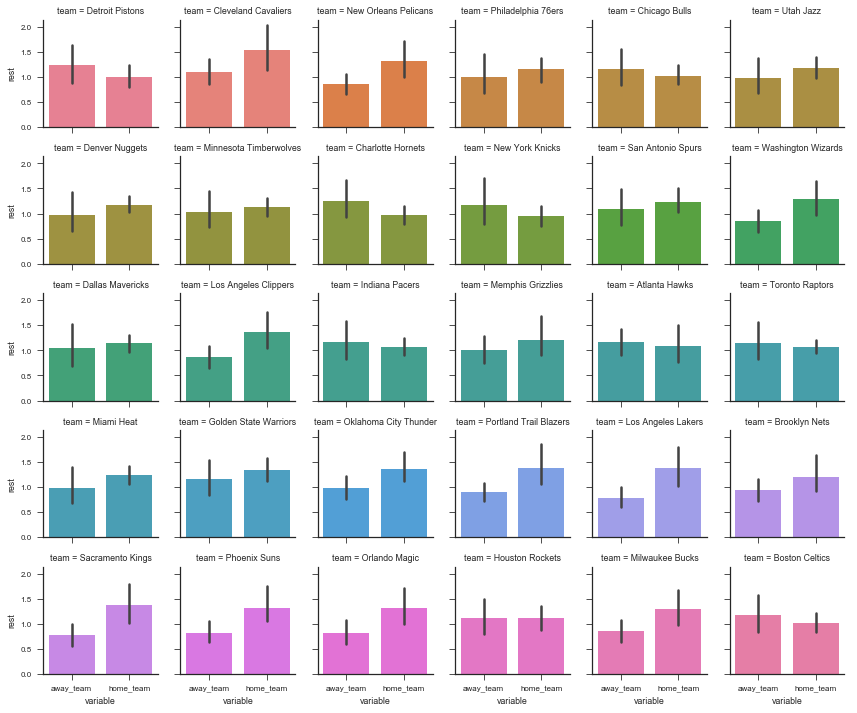

In [112]:
g = sns.FacetGrid(tidy, col='team', col_wrap=6, hue='team', size=2)
#Data is shown in two bar plots as Size is 2 and there are  6 types based on all the teams
g.map(sns.barplot, 'variable', 'rest'); #Here x axis is rest and y axis is variable.

In [113]:
df['home_win'] = df['home_points'] > df['away_points'] # here dataframe for homewin is equal to df of home points
                                                       #is greater than df of away points.
df['rest_spread'] = df['home_rest'] - df['away_rest']  #df of restspread is equal to df of homerest is reduced by
                                                       #df of away rest to obtain the required results
df.dropna().head()

,,away_team,away_points,home_team,home_points,away_rest,home_rest,home_win,rest_spread
game_id,date,,,,,,,,
17,2015-10-29,Memphis Grizzlies,112,Indiana Pacers,103,0.0,0.0,False,0.0
18,2015-10-29,Dallas Mavericks,88,Los Angeles Clippers,104,0.0,0.0,True,0.0
19,2015-10-29,Atlanta Hawks,112,New York Knicks,101,1.0,0.0,False,-1.0
20,2015-10-30,Charlotte Hornets,94,Atlanta Hawks,97,1.0,0.0,True,-1.0
21,2015-10-30,Toronto Raptors,113,Boston Celtics,103,1.0,1.0,False,0.0


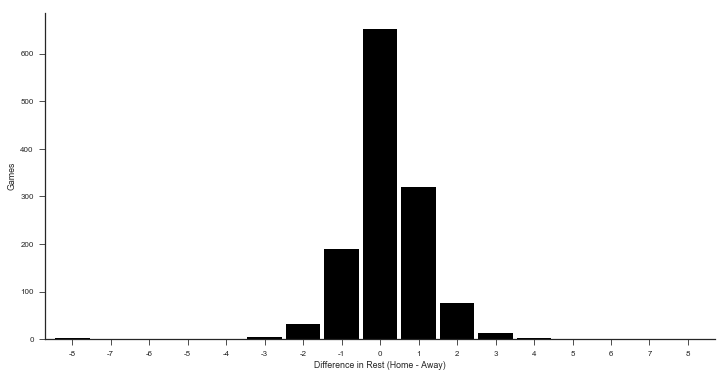

In [114]:
delta = (by_game.home_rest - by_game.away_rest).dropna().astype(int)
ax = (delta.value_counts()
    .reindex(np.arange(delta.min(), delta.max() + 1), fill_value=0)
    .sort_index()
    .plot(kind='bar', color='k', width=.9, rot=0, figsize=(12, 6))
)
#It will plot a bar graph with width .9 and rot value 0 and figsize(12,6) as required
sns.despine()
ax.set(xlabel='Difference in Rest (Home - Away)', ylabel='Games');
#x axis represents the difference in rest values and y axis represent s the values of games

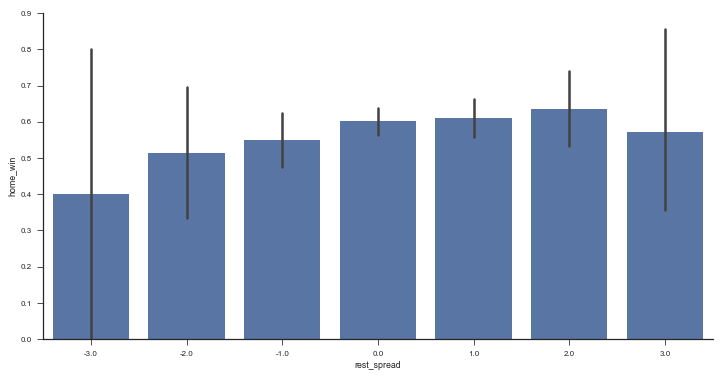

In [115]:
fig, ax = plt.subplots(figsize=(12, 6))#subplots are plotted with a particular fig size
sns.barplot(x='rest_spread', y='home_win', data=df.query('-3 <= rest_spread <= 3'),
            color='#4c72b0', ax=ax)
sns.despine()

In [116]:
rest = (tidy.groupby(['date', 'variable'])   #Let us group using date and  variables 
            .rest.mean()
            .dropna())
rest.head()

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
Name: rest, dtype: float64

In [117]:
rest.unstack().head() #This will unstack the head values from the data set

variable,away_team,home_team
date,,
2015-10-28,0.000000,0.000000
2015-10-29,0.333333,0.000000
2015-10-30,1.083333,0.916667
2015-10-31,0.166667,0.833333
2015-11-01,1.142857,1.000000


In [118]:
rest.unstack().stack() #This will unstack the head values from the data set

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
                           ...   
2016-06-13  home_team    2.000000
2016-06-16  away_team    2.000000
            home_team    2.000000
2016-06-19  away_team    2.000000
            home_team    2.000000
Length: 418, dtype: float64

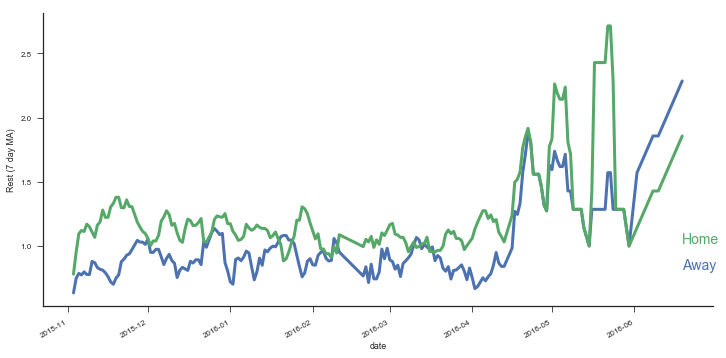

In [119]:
with sns.color_palette() as pal: #sns.color_palette will give color to the lines in the graph to differentiate.
    b, g = pal.as_hex()[:2]

ax=(rest.unstack()
        .query('away_team < 7')  #Query will be processed in the unstack data.
        .rolling(7)
        .mean()
        .plot(figsize=(12, 6), linewidth=3, legend=False))
ax.set(ylabel='Rest (7 day MA)')                                #It will represent the graph as per our values mentioned in the 
ax.annotate("Home", (rest.index[-1][0], 1.02), color=g, size=14) #ax.annote() function.
ax.annotate("Away", (rest.index[-1][0], 0.82), color=b, size=14)
sns.despine()